# Regression with Automatic Differentiation in TensorFlow

# Task 1: TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Task 2: Constants

In [2]:
tf.constant([[1, 2, 3]])

<tf.Tensor: id=0, shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]], dtype=int32)>

In [3]:
tf.convert_to_tensor([[1, 2, 3]])

<tf.Tensor: id=1, shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]], dtype=int32)>

In [4]:
tf.convert_to_tensor([[1, 2, 3]], dtype=tf.float32)

<tf.Tensor: id=2, shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [5]:
tf.convert_to_tensor([[1, 2, 3]]).numpy()

array([[1, 2, 3]], dtype=int32)

# Task 3: Variables

In [6]:
tf.Variable([[1, 2, 3]])

<tf.Variable 'Variable:0' shape=(1, 3) dtype=int32, numpy=array([[1, 2, 3]], dtype=int32)>

In [7]:
v = tf.Variable(1)
print('Initial value:', v.numpy())
v.assign(2)
print('New value:', v.numpy())

Initial value: 1
New value: 2


In [8]:
c = tf.convert_to_tensor(np.random.randn(2, 3))
v = tf.Variable(np.random.randn(3, 1))

print(tf.matmul(c, v))

tf.Tensor(
[[ 0.62604397]
 [-1.02949094]], shape=(2, 1), dtype=float64)


# Task 4: Automatic Differentiation

Let's take a simple equation as an example:
\begin{equation}
y = x^3 ; \frac{dy}{dx} = 3x^2
\end{equation}

In [9]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**3

dy_dx = tape.gradient(y, x)
print('gradient at x={} is {}'.format(x.numpy(), dy_dx.numpy()))

gradient at x=3.0 is 27.0


What about higher order gradients?

\begin{equation}
y = x^3 ; \frac{dy}{dx} = 3x^2 ; \frac{d^2 y}{dx^2} = 6x
\end{equation}

In [10]:
x = tf.Variable(3.0)

with tf.GradientTape() as t1:
    with tf.GradientTape() as t2:
        y = x**3
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t1.gradient(dy_dx, x)

print('2nd order gradient at x={} is {}'.format(x.numpy(), d2y_dx2.numpy()))

2nd order gradient at x=3.0 is 18.0


# Task 5: Watching Tensors

In [11]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    y = x**3
dy_dx = tape.gradient(y, x)

print(dy_dx)

None


In [12]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**3
dy_dx = tape.gradient(y, x)

print(dy_dx)

tf.Tensor(27.0, shape=(), dtype=float32)


# Task 6: Persistent Tape

\begin{equation}
y = x^3 ; z = 2y ; \frac{dz}{dx} = \frac{dz}{dy} . \frac{dy}{dx}
\end{equation}

In [13]:
x = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape:
    y = x**3
    z = 2*y

dz_dy = tape.gradient(z, y)
dy_dx = tape.gradient(y, x)
dz_dx = tape.gradient(z, x)

del tape

print('dz_dy =', dz_dy.numpy())
print('dy_dx =', dy_dx.numpy())
print('dz_dx =', dz_dx.numpy())

print('dz_dx =', dy_dx.numpy() * dz_dy.numpy())

dz_dy = 2.0
dy_dx = 27.0
dz_dx = 54.0
dz_dx = 54.0


# Task 7: Generating Data for Linear Regression

Solve a simple linear regression equation:

\begin{equation}
y = wx + b
\end{equation}

In [14]:
true_w, true_b = 7.0, 4.0

def create_batch(batch_size=64):
    x = np.random.randn(batch_size, 1)
    y = np.random.randn(batch_size, 1) + true_w * x + true_b
    
    return x, y

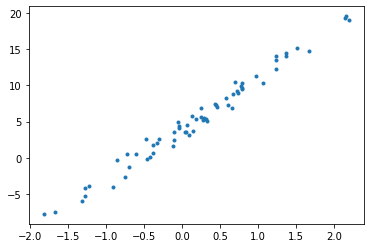

In [15]:
x, y = create_batch()

plt.plot(x, y, '.');

# Task 8: Linear Regression

In [16]:
iterations = 100
lr = 0.03

w = tf.Variable(10.0)
b = tf.Variable(1.0)

param_history = {'w': [], 'b': []}

for i in range(0, iterations):
    x_batch, y_batch = create_batch()
    x_batch = tf.constant(x_batch, dtype=tf.float32)
    y_batch = tf.constant(y_batch, dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        y = b + w * x_batch
        loss = tf.reduce_mean(tf.square(y - y_batch))
    dw = tape.gradient(loss, w)
    db = tape.gradient(loss, b)
    
    del tape
    
    w.assign_sub(lr * dw)
    b.assign_sub(lr * db)
    
    param_history['w'].append(w.numpy())
    param_history['b'].append(b.numpy())
    
    if i%10==0:
        print('At iter {}, w={}, b={}'.format(i, w.numpy(), b.numpy()))

At iter 0, w=9.821869850158691, b=1.167441964149475
At iter 10, w=8.50590991973877, b=2.527695655822754
At iter 20, w=7.873815059661865, b=3.177090883255005
At iter 30, w=7.488373756408691, b=3.5323948860168457
At iter 40, w=7.279997825622559, b=3.7192461490631104
At iter 50, w=7.139211177825928, b=3.8322129249572754
At iter 60, w=7.043071746826172, b=3.86482572555542
At iter 70, w=7.006255626678467, b=3.9204699993133545
At iter 80, w=7.016368389129639, b=3.9447178840637207
At iter 90, w=7.024758338928223, b=4.004655838012695


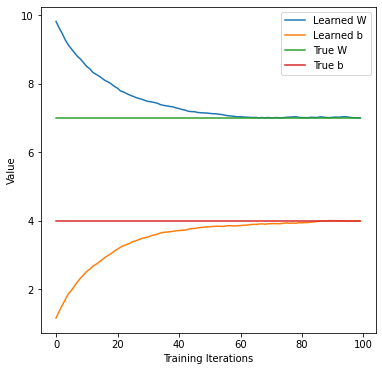

In [17]:
plt.figure(figsize=(6, 6))
plt.plot(range(iterations), param_history['w'], label='Learned W')
plt.plot(range(iterations), param_history['b'], label='Learned b')
plt.plot(range(iterations), [true_w]*iterations, label='True W')
plt.plot(range(iterations), [true_b]*iterations, label='True b')
plt.xlabel('Training Iterations')
plt.ylabel('Value')
plt.legend()
plt.show()